In [1]:
# import the dataset from local repository
import pandas as pd
df = pd.read_csv('hr_violation.csv')
df

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2262,Meghalaya,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),0.0,0.0,0.0
2263,Nagaland,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),0.0,0.0,0.0
2264,Odisha,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),5.0,1.0,0.0
2265,Uttar Pradesh,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),6.0,5.0,0.0


In [2]:
# drop unneccesary columns from the dataset
df.drop(['Group_Name', 'Sub_Group_Name'], axis = 1, inplace = True)
df

,Area_Name,Year,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,0.0,0.0,0.0
1,Arunachal Pradesh,2001,0.0,0.0,0.0
2,Assam,2001,0.0,0.0,0.0
3,Bihar,2001,0.0,0.0,0.0
4,Chandigarh,2001,0.0,0.0,0.0
...,...,...,...,...,...
2262,Meghalaya,2010,0.0,0.0,0.0
2263,Nagaland,2010,0.0,0.0,0.0
2264,Odisha,2010,5.0,1.0,0.0
2265,Uttar Pradesh,2010,6.0,5.0,0.0


In [3]:
# check null values in the dataset
df.isnull().sum()

Area_Name                                           0
Year                                                0
Cases_Registered_under_Human_Rights_Violations      2
Policemen_Chargesheeted                            54
Policemen_Convicted                               104
dtype: int64

In [4]:
# fill null values with 0
df.fillna(0, inplace = True)

In [5]:
# change datatypes of columns to int
df.iloc[:, 2] = df.iloc[:, 2].astype(int)
df.iloc[:, 3] = df.iloc[:, 3].astype(int)
df.iloc[:, 4] = df.iloc[:, 4].astype(int)
df

,Area_Name,Year,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,0,0,0
1,Arunachal Pradesh,2001,0,0,0
2,Assam,2001,0,0,0
3,Bihar,2001,0,0,0
4,Chandigarh,2001,0,0,0
...,...,...,...,...,...
2262,Meghalaya,2010,0,0,0
2263,Nagaland,2010,0,0,0
2264,Odisha,2010,5,1,0
2265,Uttar Pradesh,2010,6,5,0


In [6]:
# rename columns
hrviolation = df.rename(columns = {'Cases_Registered_under_Human_Rights_Violations': 'Cases Registered'})
hrviolation

,Area_Name,Year,Cases Registered,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,0,0,0
1,Arunachal Pradesh,2001,0,0,0
2,Assam,2001,0,0,0
3,Bihar,2001,0,0,0
4,Chandigarh,2001,0,0,0
...,...,...,...,...,...
2262,Meghalaya,2010,0,0,0
2263,Nagaland,2010,0,0,0
2264,Odisha,2010,5,1,0
2265,Uttar Pradesh,2010,6,5,0


In [7]:
import matplotlib.pyplot as plt
import numpy as np
def analyse(df):
    areas = list(df.iloc[:, 0].unique())
    time = list(df.iloc[:, 1].unique())
    year = []
    pc = []
    for i in time:
        new = df[df.iloc[:, 1] == i]
        pc = [[] for i in range(3)]
        r = np.arange(len(areas))
        w = 0.4
        for j in areas:
            pc[0].append(sum(new[new.iloc[:, 0] == j].iloc[:, 2]))
            pc[1].append(sum(new[new.iloc[:, 0] == j].iloc[:, 3]))
            pc[2].append(sum(new[new.iloc[:, 0] == j].iloc[:, 4]))
        s = str(i) + " Statewise Human Rights Violation" 
        plt.figure(figsize = (16, 9))
        plt.bar(r, pc[0], width = 0.4)
        plt.bar(r + w, pc[1], width = 0.4)
        plt.bar(r + w * 2, pc[2], width = 0.4)
        plt.xticks(r, areas, rotation = 90)
        plt.title(s, bbox={'facecolor':'0.8', 'pad':5}, loc = 'center')
        plt.legend(['Cases Registered', 'Policemen_Chargesheeted', 'Policemen_Convicted'])
        plt.show()

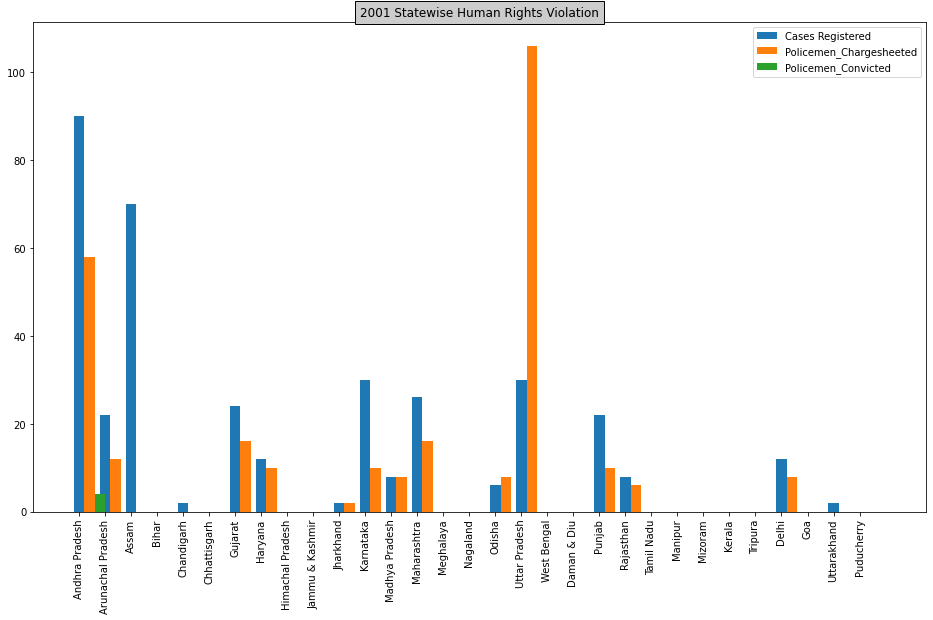

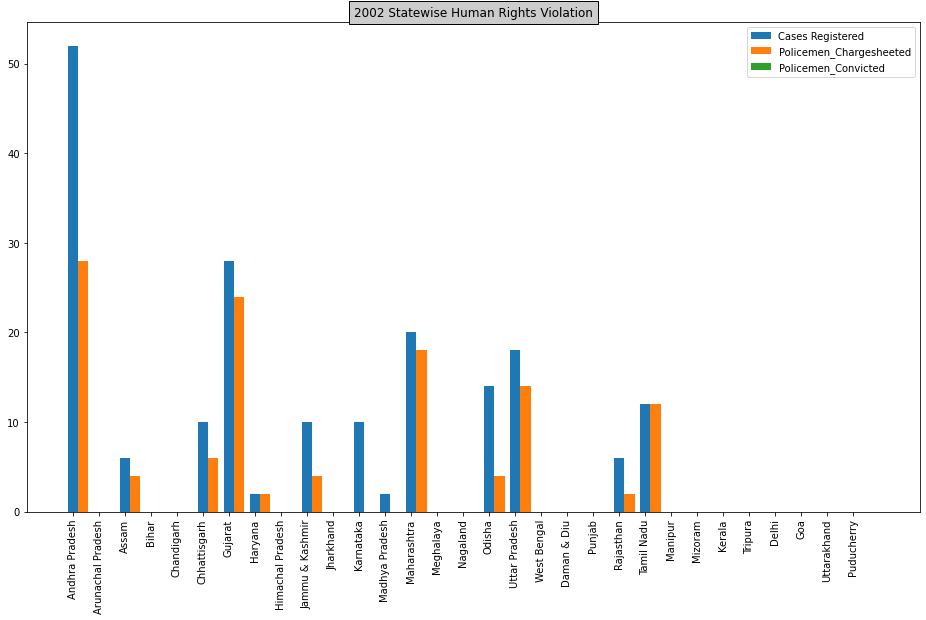

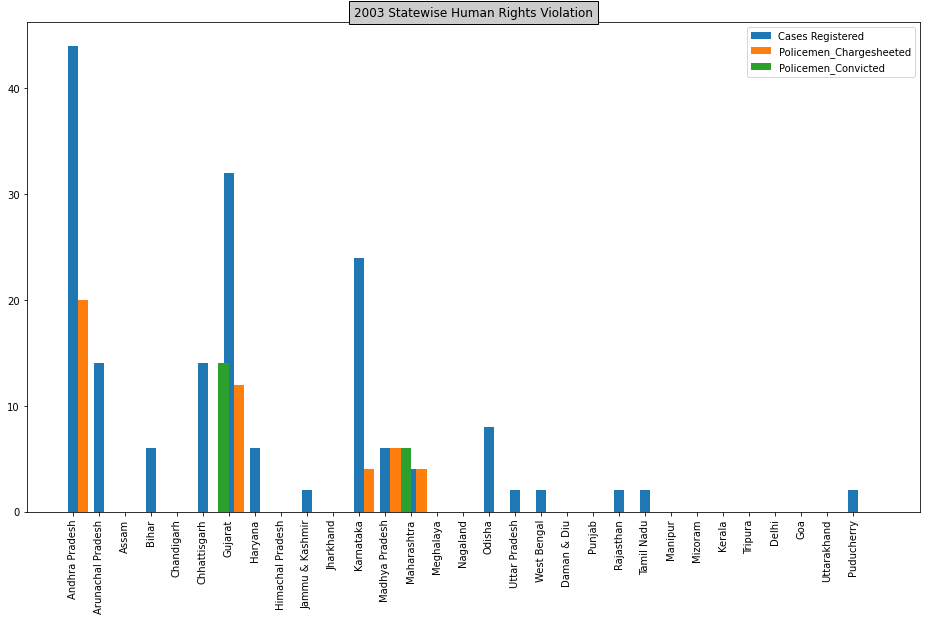

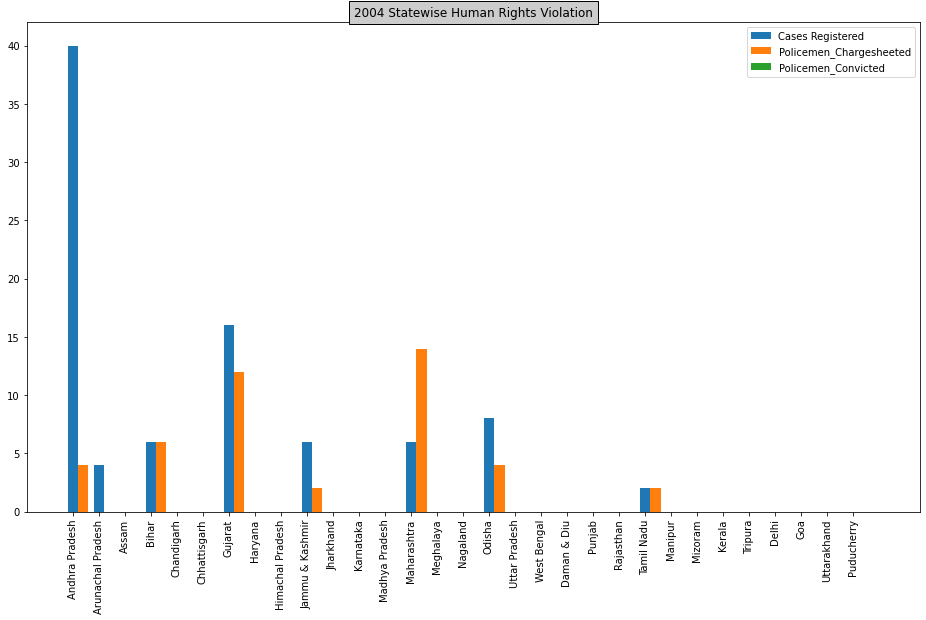

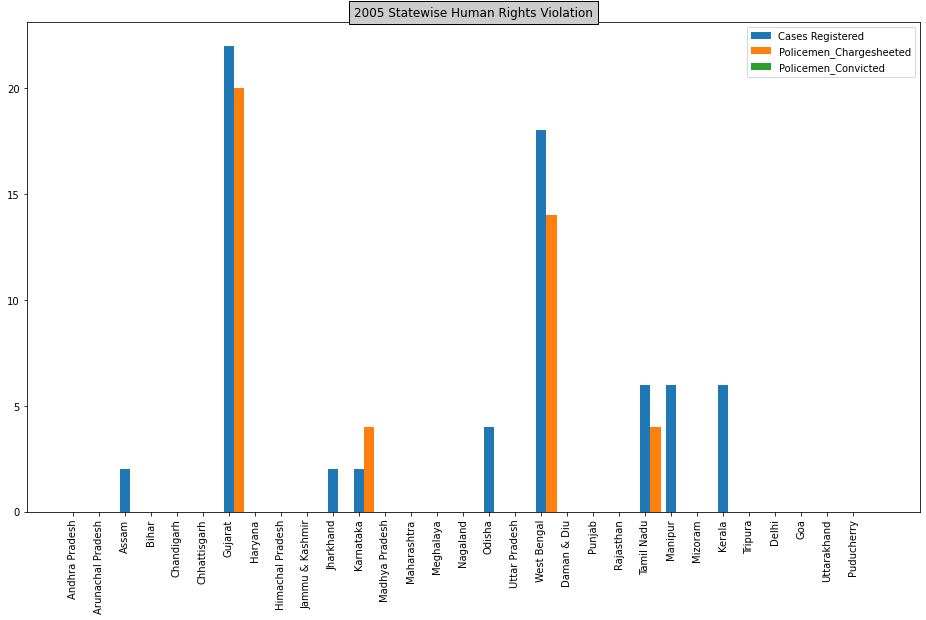

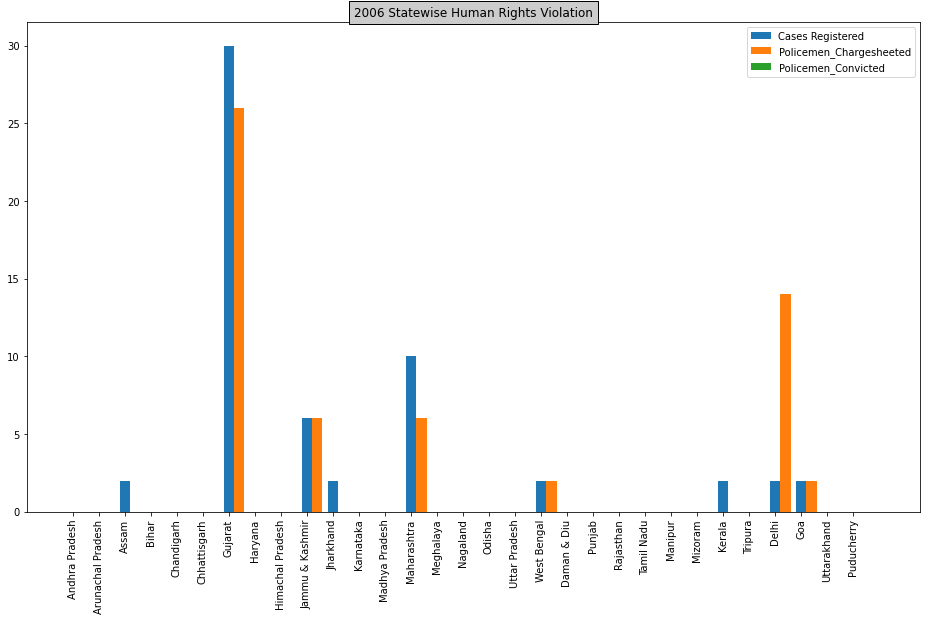

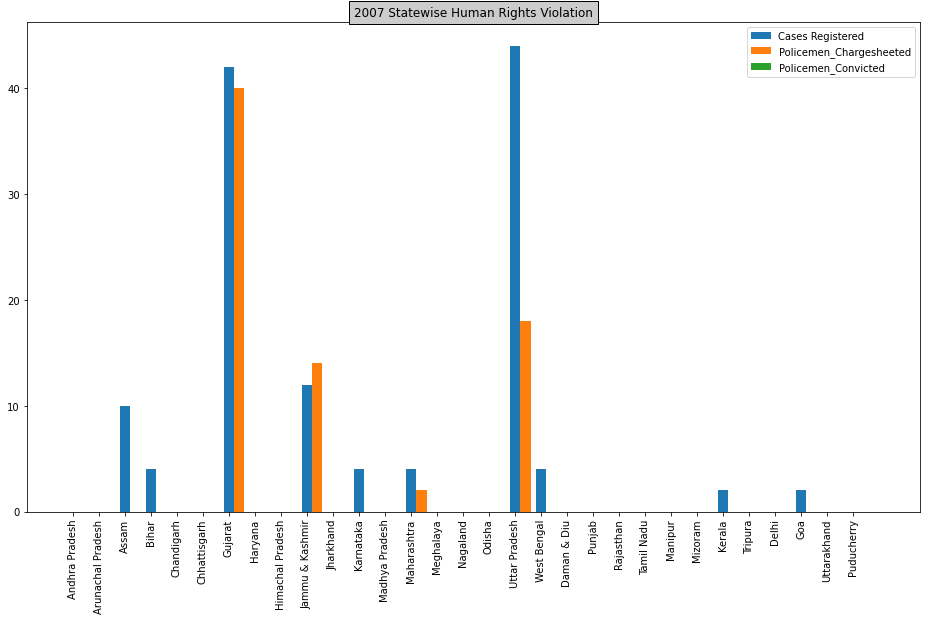

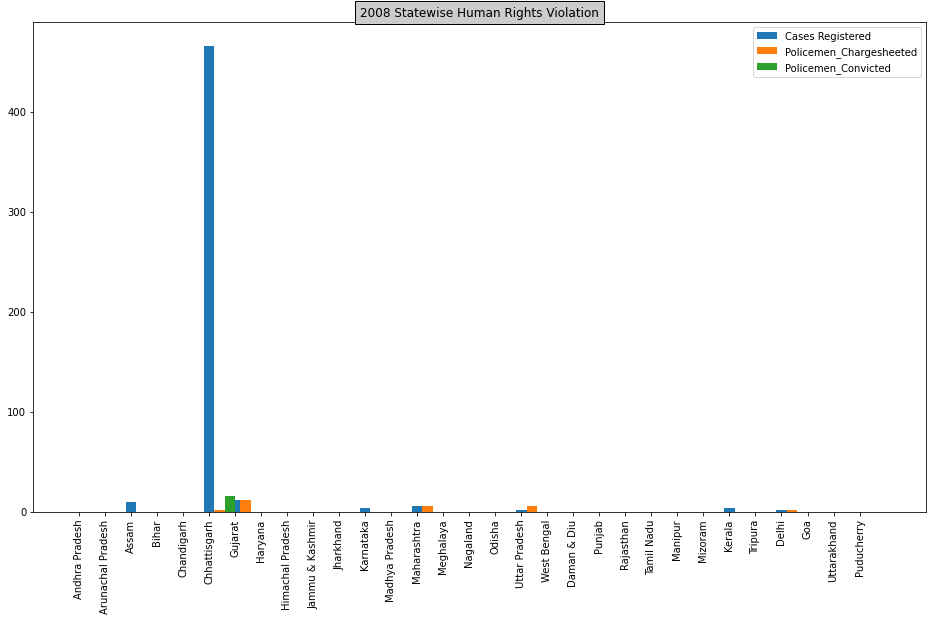

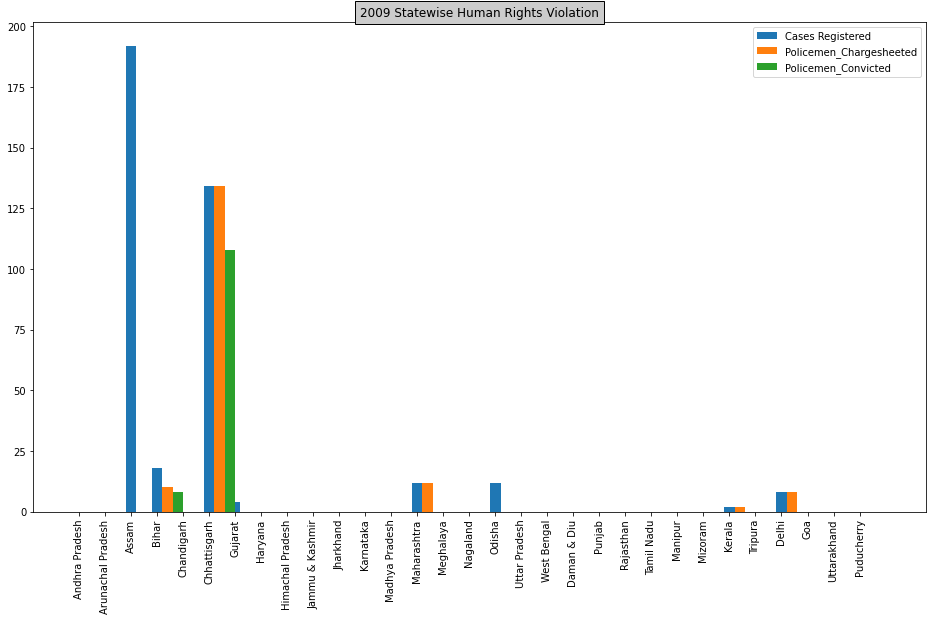

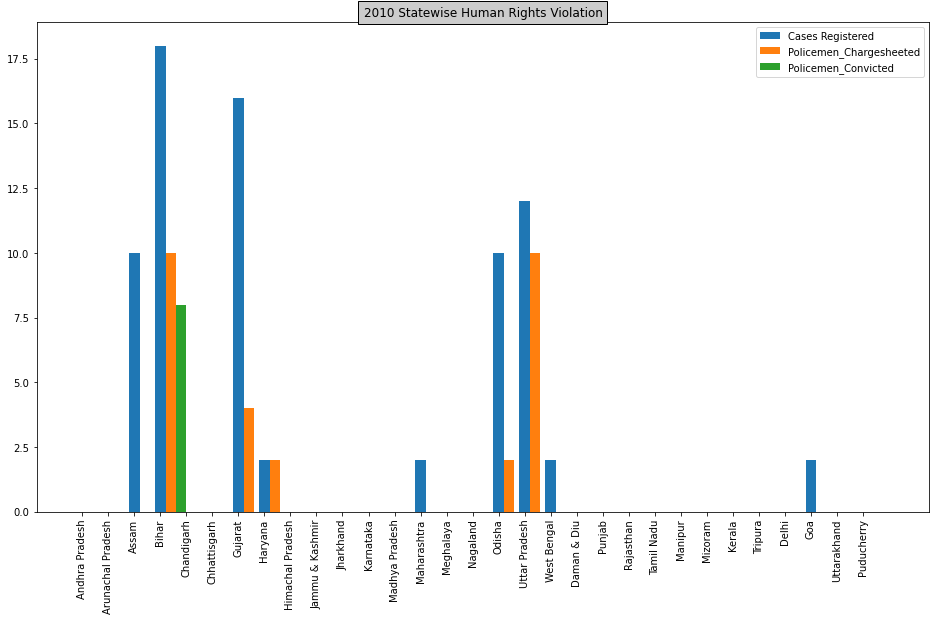

In [8]:
analyse(hrviolation)